In [1]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from thesis_tools.utils.data import *

# Test self-made lib

In [3]:
from thesis_tools.models.bayesian_multivariate_cross_sectional import *

In [4]:
df = read_billionaires_data(only_years=['2018'])

In [5]:
model = Multivariate_Weibull(data=df)

In [6]:
model.fit()

## Check prior predictive

In [7]:
prior = model.prior_predictive()
pd.DataFrame(prior)

Sampling: [alpha_pymc, beta_pymc, y]


,gamma,alpha,y
Alps,"[0.1101074751795481, 0.09299659900657609, 0.27...","[8.873851943834197, 10.634305165708835, 3.9285...","[2.147431251014129, 4.464940478189287, 3.39243..."
Asian Islands,"[0.15754140900554897, 0.5864401542872953, 0.34...","[6.798045150655272, 1.507601172629834, 3.56433...","[39.925185414959856, 3.0431809214464436, 1.185..."
Australia,"[0.95453660502768, 0.30213281703255124, 0.5042...","[2.0603649746457777, 3.3701476103064114, 1.882...","[1.0395226432368287, 1.1876990302073798, 2.670..."
Brazil,"[0.11226494288184896, 0.12472550865269763, 0.2...","[9.352244281433288, 7.967491157999878, 4.56454...","[7.908632128410322, 230790.0700223229, 210.853..."
British Islands,"[0.3023167563226564, 0.11567470135021733, 0.20...","[3.642517338711023, 8.705528351370372, 5.06249...","[10.96467921408917, 1.215057443998058, 4.74632..."
Canada,"[0.2792614289086701, 1.3913987896088464, 0.300...","[3.3833249916950394, 0.8398017062846247, 2.912...","[222.35565542389557, 4.429897951691371, 6.1442..."
China,"[0.20099972885424633, 0.5463695447411717, 0.20...","[5.405082606615462, 2.2507607712600306, 4.7789...","[1.922070322828011, 5.930398376777033, 1.58197..."
France,"[0.28900914886648765, 0.1779304410114498, 0.45...","[4.456785248403311, 5.822329392628749, 1.98321...","[268.305893298508, 1.654372112432467, 1.118932..."
Germany,"[0.5757218455618394, 0.5869644711618944, 0.227...","[1.6086036725029096, 1.427970874566939, 4.4056...","[1.2464604198833684, 14.482176356439492, 645.6..."
India,"[0.46962984487129483, 0.3095778086641771, 0.09...","[2.9844674228700074, 3.8432761995758344, 10.59...","[2724.9867439358522, 1.3200703073700126, 1.810..."


In [8]:
prior_summary = model.get_prior_summary()

Sampling: [alpha_pymc, beta_pymc, y]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


In [9]:
prior_summary.get_group('alpha_obs')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Alps,7.20,10.96,0.83,19.73,0.53,0.37,397.66,311.15,NaN,alpha_obs
Asian Islands,8.20,22.08,0.69,22.21,1.05,0.74,437.15,369.17,NaN,alpha_obs
Australia,7.56,10.15,1.01,22.22,0.48,0.34,441.10,463.67,NaN,alpha_obs
Brazil,8.39,13.14,0.86,24.35,0.65,0.46,454.76,408.74,NaN,alpha_obs
British Islands,12.87,112.37,0.75,22.98,5.02,3.56,510.07,514.39,NaN,alpha_obs
Canada,8.12,18.02,0.72,18.50,0.79,0.56,550.30,418.55,NaN,alpha_obs
China,9.11,25.54,0.57,26.00,1.14,0.80,467.77,325.58,NaN,alpha_obs
France,8.48,16.20,0.67,20.53,0.71,0.50,513.31,386.43,NaN,alpha_obs
Germany,9.88,35.31,0.74,24.38,1.62,1.14,342.41,438.47,NaN,alpha_obs


In [10]:
prior_summary.get_group('gamma_obs')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Alps,0.30,0.22,0.01,0.69,0.01,0.01,405.90,502.55,NaN,gamma_obs
Asian Islands,0.29,0.20,0.00,0.63,0.01,0.01,448.42,426.49,NaN,gamma_obs
Australia,0.29,0.21,0.02,0.68,0.01,0.01,432.07,463.67,NaN,gamma_obs
Brazil,0.27,0.21,0.01,0.70,0.01,0.01,458.08,408.74,NaN,gamma_obs
British Islands,0.30,0.22,0.00,0.71,0.01,0.01,495.84,514.39,NaN,gamma_obs
Canada,0.28,0.22,0.00,0.68,0.01,0.01,533.95,472.24,NaN,gamma_obs
China,0.28,0.21,0.01,0.65,0.01,0.01,476.73,391.94,NaN,gamma_obs
France,0.30,0.23,0.01,0.72,0.01,0.01,515.08,414.97,NaN,gamma_obs
Germany,0.28,0.21,0.02,0.71,0.01,0.01,350.76,438.95,NaN,gamma_obs


## Check posterior predictive

In [25]:
posterior = model.posterior_predictive()
posterior_df = pd.DataFrame(posterior)
posterior_df

,gamma,alpha,y
Alps,"[0.6800240361690866, 0.6800468907249441, 0.845...","[1.5500083077206102, 1.9170698555086727, 2.111...","[4.698048092459415, 1.246376739873573, 2.44996..."
Asian Islands,"[0.6233525967638444, 0.6278864945653653, 0.685...","[1.486320904887369, 1.3386596903413945, 1.6777...","[7.0439855535548315, 3.516394042800632, 1.4254..."
Australia,"[0.5722145157955699, 0.5611485809483521, 0.804...","[1.3100839347568323, 1.336024340839921, 1.7185...","[1.1214860213508906, 1.8556729976643576, 2.211..."
Brazil,"[0.6127605507345266, 0.7523319729567887, 0.496...","[2.3402929100801364, 1.6671675864775213, 2.290...","[2.8290172876237194, 18.136570463008177, 2.455..."
British Islands,"[0.6648692751989379, 0.6280669626224366, 0.520...","[1.9023411025656243, 1.7539340747421894, 1.828...","[2.390896378804441, 6.526474657871113, 1.71232..."
Canada,"[0.7088639776376926, 0.6846426985789072, 0.474...","[1.5302618255858969, 1.6941245483495975, 1.755...","[4.046280709869446, 1.1928035845916616, 1.2204..."
China,"[0.5517890891562929, 0.5517541007744619, 0.483...","[1.3839538843971544, 1.3573291167025499, 1.380...","[1.0871375575946896, 1.9433033779132434, 3.133..."
France,"[0.4789928527086486, 0.5140611089975865, 0.516...","[2.7671946826011524, 2.862730437411006, 2.1643...","[2.7177373424436366, 1.1494278970579022, 10.29..."
Germany,"[0.47748222100608745, 0.47296374582528244, 0.5...","[2.0437275275787363, 2.1059705004657947, 2.044...","[8.961194689760179, 14.68367301716988, 2.65369..."
India,"[0.5608471173469868, 0.5676054323593686, 0.518...","[1.6905424923471688, 1.691528005633565, 1.8438...","[1.6963899370896742, 15.107150174552885, 1.232..."


In [26]:
# append a new column that is the mean of the list stored in the 'y' column
posterior_df['y_mean'] = posterior_df['y'].apply(lambda x: np.mean(x))

In [27]:
posterior_df

,gamma,alpha,y,y_mean
Alps,"[0.6800240361690866, 0.6800468907249441, 0.845...","[1.5500083077206102, 1.9170698555086727, 2.111...","[4.698048092459415, 1.246376739873573, 2.44996...",4.029973
Asian Islands,"[0.6233525967638444, 0.6278864945653653, 0.685...","[1.486320904887369, 1.3386596903413945, 1.6777...","[7.0439855535548315, 3.516394042800632, 1.4254...",3.371709
Australia,"[0.5722145157955699, 0.5611485809483521, 0.804...","[1.3100839347568323, 1.336024340839921, 1.7185...","[1.1214860213508906, 1.8556729976643576, 2.211...",2.953565
Brazil,"[0.6127605507345266, 0.7523319729567887, 0.496...","[2.3402929100801364, 1.6671675864775213, 2.290...","[2.8290172876237194, 18.136570463008177, 2.455...",4.413257
British Islands,"[0.6648692751989379, 0.6280669626224366, 0.520...","[1.9023411025656243, 1.7539340747421894, 1.828...","[2.390896378804441, 6.526474657871113, 1.71232...",3.887335
Canada,"[0.7088639776376926, 0.6846426985789072, 0.474...","[1.5302618255858969, 1.6941245483495975, 1.755...","[4.046280709869446, 1.1928035845916616, 1.2204...",3.507921
China,"[0.5517890891562929, 0.5517541007744619, 0.483...","[1.3839538843971544, 1.3573291167025499, 1.380...","[1.0871375575946896, 1.9433033779132434, 3.133...",3.160228
France,"[0.4789928527086486, 0.5140611089975865, 0.516...","[2.7671946826011524, 2.862730437411006, 2.1643...","[2.7177373424436366, 1.1494278970579022, 10.29...",8.266178
Germany,"[0.47748222100608745, 0.47296374582528244, 0.5...","[2.0437275275787363, 2.1059705004657947, 2.044...","[8.961194689760179, 14.68367301716988, 2.65369...",4.653733
India,"[0.5608471173469868, 0.5676054323593686, 0.518...","[1.6905424923471688, 1.691528005633565, 1.8438...","[1.6963899370896742, 15.107150174552885, 1.232...",3.854130


In [12]:
posterior_summary = model.get_posterior_summary()

In [28]:
posterior_summary.get_group('gamma_obs')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Alps,0.63,0.09,0.46,0.80,0.0,0.0,6704.98,3074.53,1.0,gamma_obs
Asian Islands,0.62,0.06,0.50,0.73,0.0,0.0,6685.85,3344.31,1.0,gamma_obs
Australia,0.67,0.08,0.53,0.82,0.0,0.0,7466.87,3421.69,1.0,gamma_obs
Brazil,0.55,0.07,0.42,0.68,0.0,0.0,6176.46,2900.28,1.0,gamma_obs
British Islands,0.58,0.07,0.46,0.71,0.0,0.0,6445.25,3070.15,1.0,gamma_obs
Canada,0.61,0.07,0.49,0.74,0.0,0.0,7278.20,3344.89,1.0,gamma_obs
China,0.52,0.02,0.48,0.56,0.0,0.0,5889.29,3323.17,1.0,gamma_obs
France,0.44,0.05,0.34,0.53,0.0,0.0,6686.97,2781.40,1.0,gamma_obs
Germany,0.54,0.06,0.45,0.65,0.0,0.0,5500.68,3273.32,1.0,gamma_obs


In [29]:
posterior_summary.get_group('alpha_obs')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Alps,1.90,0.23,1.47,2.32,0.0,0.0,4010.14,2849.91,1.0,alpha_obs
Asian Islands,1.57,0.16,1.26,1.86,0.0,0.0,4024.42,2733.46,1.0,alpha_obs
Australia,1.45,0.18,1.13,1.78,0.0,0.0,4188.73,2918.57,1.0,alpha_obs
Brazil,1.92,0.23,1.50,2.35,0.0,0.0,3969.94,2652.75,1.0,alpha_obs
British Islands,1.83,0.19,1.49,2.19,0.0,0.0,4197.49,2940.47,1.0,alpha_obs
Canada,1.63,0.19,1.28,2.00,0.0,0.0,4033.29,2191.47,1.0,alpha_obs
China,1.36,0.06,1.25,1.47,0.0,0.0,4291.56,3364.96,1.0,alpha_obs
France,2.47,0.27,2.01,2.99,0.0,0.0,3816.69,2869.75,1.0,alpha_obs
Germany,2.06,0.17,1.74,2.38,0.0,0.0,4395.80,3191.16,1.0,alpha_obs


## Check trace

In [15]:
trace = model.get_trace()

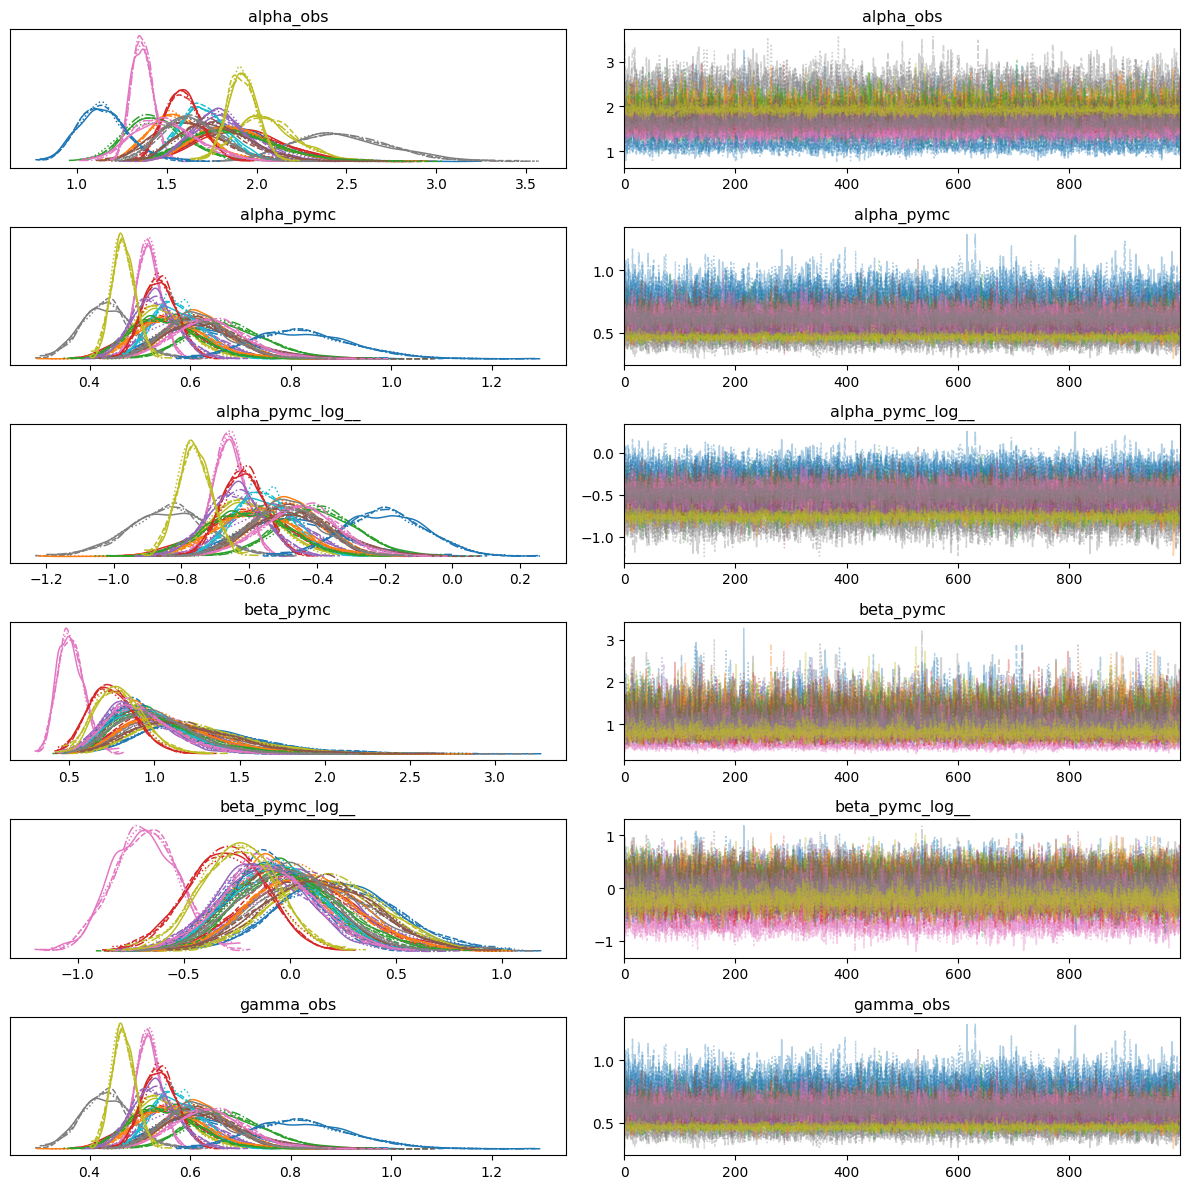

In [17]:
az.plot_trace(trace)
plt.tight_layout()